In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, balanced_accuracy_score, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Задание 1

In [2]:
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
df_red['target'] = 1
df_white['target'] = 0

In [4]:
df = pd.concat([df_red, df_white])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [7]:
features = df.drop(['target'], axis=1)
target = df['target']

In [8]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Задание 2

In [9]:
def balanced_accuracy_score_my(y_true, y_pred):
    c_m = confusion_matrix(y_true, y_pred)
    true_positive_rate = c_m[1, 1] / (c_m[1, 0] + c_m[1, 1]) # Здесь я вычисляю чувствительность, она вычисляется по формуле TP/(TP+FN)
    true_negative_rate = c_m[0, 0] / (c_m[0, 1] + c_m[0, 0]) # Здесь я вычисляю специфичность, она вычисляется по формуле TN/(TN+FP)
    return 1/2 * (true_positive_rate + true_negative_rate) 
# мы возвращаем среднее арифметическое суммы чувствительности и специфичности, как написано в документации.

y_true =  [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

score = balanced_accuracy_score_my(y_true, y_pred)
bibl_score = balanced_accuracy_score(y_true, y_pred)
print(f'Результат полученный через свою функцию:{score}')
print(f'Результат полученный через библиотечную функцию:{bibl_score}')

Результат полученный через свою функцию:0.6071428571428572
Результат полученный через библиотечную функцию:0.6071428571428572


# Задание 3

### Задание 3a.

In [10]:
model_tree = DecisionTreeClassifier(max_depth=9, random_state=7)
model_tree.fit(features_train, target_train)

pred_train_tree = model_tree.predict(features_train)
pred_test_tree = model_tree.predict(features_test)

print(f'F1-Score_Train:{f1_score(pred_train_tree, target_train)}')
print(f'F1-Score_Test:{f1_score(pred_test_tree, target_test)}')

F1-Score_Train:0.992811501597444
F1-Score_Test:0.9676470588235294


### Задание 3b.

BAS на обучающей части: 0.9994756079496907
BAS на валидационной части0.9790072411051665
BAS на обучающей части: 0.996666381341355
BAS на валидационной части0.9762307682771103
BAS на обучающей части: 0.9931931086901444
BAS на валидационной части0.984447465216696


BAS на обучающей части: 0.9929768315509878
BAS на валидационной части0.9832159215373892
BAS на обучающей части: 0.9908313763896198
BAS на валидационной части0.9791708154933785
BAS на обучающей части: 0.987396875773165
BAS на валидационной части0.9782453726088196
BAS на обучающей части: 0.98620839633839
BAS на валидационной части0.9791708154933785
BAS на обучающей части: 0.9859424889507709
BAS на валидационной части0.9791708154933785
BAS на обучающей части: 0.9828116251382092
BAS на валидационной части0.9744522629138014
BAS на обучающей части: 0.9827949095361319
BAS на валидационной части0.9738884729039753
BAS на обучающей части: 0.9840897943453737
BAS на валидационной части0.9713186623196997
BAS на обучающей части: 0.9855451140078424
BAS на валидационной части0.963236630675828
BAS на обучающей части: 0.9843520530055773
BAS на валидационной части0.960843741225018
BAS на обучающей части: 0.9838209958165324
BAS на валидационной части0.960843741225018
BAS на обучающей части: 0.984436443220

Text(0, 0.5, 'BAS')

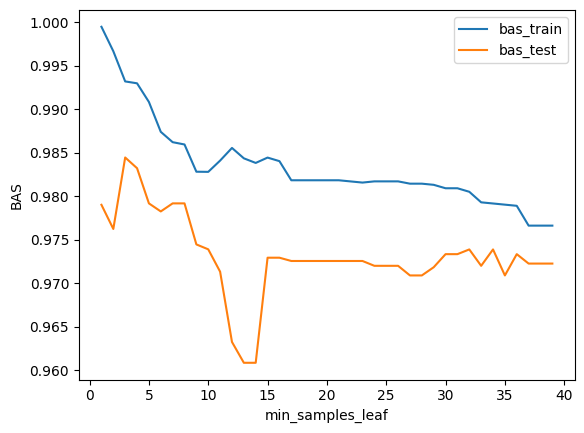

In [11]:
res = []
for param in range(1, 40):
    model = DecisionTreeClassifier(min_samples_leaf=param, random_state=42)
    
    model.fit(features_train, target_train)
    
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)
    print(f'BAS на обучающей части: {balanced_accuracy_score(pred_train, target_train)}')
    print(f'BAS на валидационной части{balanced_accuracy_score(pred_test, target_test)}')
    res.append([param, balanced_accuracy_score(pred_train, target_train), balanced_accuracy_score(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'bas_train', 'bas_test'])

res_pd.set_index('min_samples_leaf')['bas_train'].plot(label='bas_train')
res_pd.set_index('min_samples_leaf')['bas_test'].plot(label='bas_test')
plt.legend()
plt.ylabel('BAS')

### Переобучение происходит при отметке минимального количества образцов в листе для валидационной части от 10 до 14, для обучающей выборки от 33 и далее.

### Задание 3c.

In [12]:
res_pd[res_pd['bas_test'] == res_pd['bas_test'].max()] # значение гиперпараметра, при котором качество модели на валидационной части наилучшее.

,min_samples_leaf,bas_train,bas_test
2,3,0.993193,0.984447


# Задание 4

### Задание 4a.

In [13]:
model_forest_first = RandomForestClassifier(n_estimators=15, min_samples_leaf=4, max_depth=10, random_state=7)
model_forest_first.fit(features_train, target_train)

model_forest_second = RandomForestClassifier(n_estimators=8, criterion='entropy', min_samples_split=5, random_state=7)
model_forest_second.fit(features_train, target_train)

pred_forest_first_test = model_forest_first.predict(features_test)
pred_forest_second_test = model_forest_second.predict(features_test)

print(f'Accuracy_Score_First_Test: {accuracy_score(pred_forest_first_test, target_test)}') 
print(f'Accuracy_Score_Second_Test: {accuracy_score(pred_forest_second_test, target_test)}')

Accuracy_Score_First_Test: 0.9915384615384616
Accuracy_Score_Second_Test: 0.9938461538461538


### Задание 4b.

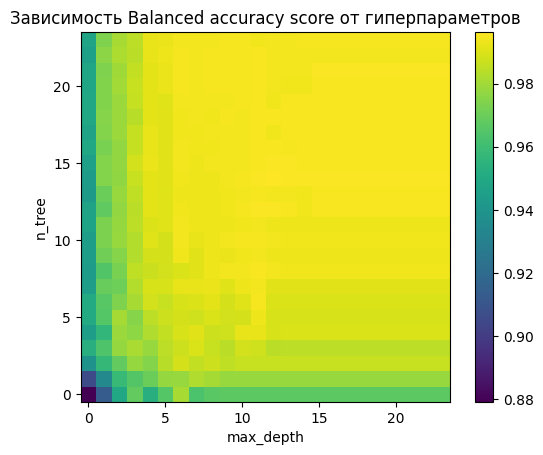

In [14]:
res = []
for n_tree in range(1, 25):
    for maxd in range(1, 25):
        model = RandomForestClassifier(n_estimators=n_tree, min_samples_leaf=2, max_depth=maxd, random_state=7)
    
        model.fit(features_train, target_train)

        pred_train = model.predict(features_train)
        pred_test = model.predict(features_test)
    
        res.append([n_tree, maxd, balanced_accuracy_score(pred_train, target_train), balanced_accuracy_score(pred_test, target_test)])
    
    res_pd = pd.DataFrame(res, columns=['n_tree', 'maxd', 'BAS_Train', 'BAS_Test'])
plt.imshow(res_pd.pivot(index='n_tree', columns='maxd', values='BAS_Test'), aspect='equal', origin='lower')
plt.colorbar()
plt.ylabel('n_tree')
plt.xlabel('max_depth')
plt.title('Зависимость Balanced accuracy score от гиперпараметров')
plt.show()

### Задание 4c.

In [15]:
res_pd[res_pd['BAS_Test'] == res_pd['BAS_Test'].max()]

,n_tree,maxd,BAS_Train,BAS_Test
348,15,13,0.998734,0.996377


# Задание 5

### Задание 5a

In [16]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.3, random_state=42)

### Задание 5b

In [17]:
model = XGBClassifier(n_estimators=5, max_depth=5, learning_rate=0.1)
model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_val, target_val)])

pred_train_xgb = model.predict(features_train)
pred_test_xgb = model.predict(features_test)

print(f'Метрика качества для обучающей выборки: {balanced_accuracy_score(pred_train_xgb, target_train)}')
print(f'Метрика качества для валидационной выборки:{balanced_accuracy_score(pred_test_xgb, target_test)}')

[0]	validation_0-logloss:0.46603	validation_1-logloss:0.48040
[1]	validation_0-logloss:0.40363	validation_1-logloss:0.41673
[2]	validation_0-logloss:0.35452	validation_1-logloss:0.36693
[3]	validation_0-logloss:0.31388	validation_1-logloss:0.32602
[4]	validation_0-logloss:0.27941	validation_1-logloss:0.29121
Метрика качества для обучающей выборки: 0.9851355378432715
Метрика качества для валидационной выборки:0.9751666666666666


### Задание 5c

In [18]:
n_tree = 5
class_matrix = []
for l_rate in range(2, 6): # я понимаю, что лучше брать размер шага от 0 до 1, но так думаю будет более нагляднее результаты
    for maxd in range(7, 11):
        model = XGBClassifier(n_estimators=n_tree, max_depth=maxd, learning_rate=l_rate, random_state=42)
        model.fit(features_train_xgb, target_train_xgb, eval_set = [(features_train_xgb, target_train_xgb), (features_val, target_val)])
        
        y_pred_train = model.predict(features_train)
        y_pred_test = model.predict(features_test)
        
        class_matrix.append([l_rate, maxd, balanced_accuracy_score(y_pred_train, target_train), balanced_accuracy_score(y_pred_test, target_test)])
        print(f'')
        
df_matrix = pd.DataFrame(class_matrix, columns=('learning_rate', 'max_depth', 'y_pred_train', 'y_pred_test'))
df_matrix

[0]	validation_0-logloss:0.04818	validation_1-logloss:0.10032
[1]	validation_0-logloss:0.02722	validation_1-logloss:0.07262
[2]	validation_0-logloss:0.01541	validation_1-logloss:0.07009
[3]	validation_0-logloss:0.00672	validation_1-logloss:0.05537
[4]	validation_0-logloss:0.00539	validation_1-logloss:0.05296

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	validation_0-logloss:0.02492	validation_1-logloss:0.07345
[2]	validation_0-logloss:0.01825	validation_1-logloss:0.07042
[3]	validation_0-logloss:0.00862	validation_1-logloss:0.06261
[4]	validation_0-logloss:0.00588	validation_1-logloss:0.06441

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	validation_0-logloss:0.02307	validation_1-logloss:0.07306
[2]	validation_0-logloss:0.01218	validation_1-logloss:0.05285
[3]	validation_0-logloss:0.00668	validation_1-logloss:0.04222
[4]	validation_0-logloss:0.00439	validation_1-logloss:0.04350

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	v


[0]	validation_0-logloss:0.04862	validation_1-logloss:0.15580
[1]	validation_0-logloss:0.55625	validation_1-logloss:0.65981
[2]	validation_0-logloss:2.79586	validation_1-logloss:3.18682
[3]	validation_0-logloss:9.20292	validation_1-logloss:8.93845
[4]	validation_0-logloss:5.20757	validation_1-logloss:5.76318

[0]	validation_0-logloss:0.04776	validation_1-logloss:0.15578
[1]	validation_0-logloss:0.29971	validation_1-logloss:0.36643
[2]	validation_0-logloss:1.23466	validation_1-logloss:1.34198
[3]	validation_0-logloss:8.90679	validation_1-logloss:9.46270
[4]	validation_0-logloss:2.91785	validation_1-logloss:2.93485

[0]	validation_0-logloss:0.04776	validation_1-logloss:0.15578
[1]	validation_0-logloss:0.29971	validation_1-logloss:0.36643
[2]	validation_0-logloss:1.23466	validation_1-logloss:1.34198
[3]	validation_0-logloss:8.90679	validation_1-logloss:9.46270
[4]	validation_0-logloss:2.91785	validation_1-logloss:2.93485

[0]	validation_0-logloss:0.04776	validation_1-logloss:0.15578
[1]	

,learning_rate,max_depth,y_pred_train,y_pred_test
0,2,7,0.994505,0.984447
1,2,8,0.992789,0.976148
2,2,9,0.995676,0.980806
3,2,10,0.994232,0.982111
4,3,7,0.900137,0.889767
5,3,8,0.878296,0.874766
6,3,9,0.905251,0.898246
7,3,10,0.905251,0.898246
8,4,7,0.803599,0.811544
9,4,8,0.878805,0.875076


### Задание 5d. **Вывод: Лучшим из рассмотренных комбинаций я считаю когда величина шага минимальная и равна 2, максимальная глубина равная 8(так как 9 показывает такие же результаты, но больше глубины не нужно).**

### Задание 5e

In [19]:
n_tree = 15
class_matrix = []
for l_rate in range(2, 6):
    for maxd in range(7, 11):
        model = XGBClassifier(n_estimators=n_tree, max_depth=maxd, learning_rate=l_rate, random_state=42)
        model.fit(features_train_xgb, target_train_xgb, eval_set = [(features_train_xgb, target_train_xgb), (features_val, target_val)])
        
        y_pred_train = model.predict(features_train)
        y_pred_test = model.predict(features_test)
        
        class_matrix.append([l_rate, maxd, balanced_accuracy_score(y_pred_train, target_train), balanced_accuracy_score(y_pred_test, target_test)])
        print(f'')
        
df_matrix = pd.DataFrame(class_matrix, columns=('learning_rate', 'max_depth', 'y_pred_train', 'y_pred_test'))
df_matrix

[0]	validation_0-logloss:0.04818	validation_1-logloss:0.10032
[1]	validation_0-logloss:0.02722	validation_1-logloss:0.07262
[2]	validation_0-logloss:0.01541	validation_1-logloss:0.07009
[3]	validation_0-logloss:0.00672	validation_1-logloss:0.05537
[4]	validation_0-logloss:0.00539	validation_1-logloss:0.05296
[5]	validation_0-logloss:0.00382	validation_1-logloss:0.04547
[6]	validation_0-logloss:0.00319	validation_1-logloss:0.04847
[7]	validation_0-logloss:0.00272	validation_1-logloss:0.04535
[8]	validation_0-logloss:0.00241	validation_1-logloss:0.04168
[9]	validation_0-logloss:0.00215	validation_1-logloss:0.04277
[10]	validation_0-logloss:0.00195	validation_1-logloss:0.04283
[11]	validation_0-logloss:0.00182	validation_1-logloss:0.04270
[12]	validation_0-logloss:0.00175	validation_1-logloss:0.04306
[13]	validation_0-logloss:0.00169	validation_1-logloss:0.04405
[14]	validation_0-logloss:0.00166	validation_1-logloss:0.04324

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1


[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	validation_0-logloss:0.02307	validation_1-logloss:0.07306
[2]	validation_0-logloss:0.01218	validation_1-logloss:0.05285
[3]	validation_0-logloss:0.00668	validation_1-logloss:0.04222
[4]	validation_0-logloss:0.00439	validation_1-logloss:0.04350
[5]	validation_0-logloss:0.00339	validation_1-logloss:0.04382
[6]	validation_0-logloss:0.00280	validation_1-logloss:0.04479
[7]	validation_0-logloss:0.00222	validation_1-logloss:0.04179
[8]	validation_0-logloss:0.00208	validation_1-logloss:0.04093
[9]	validation_0-logloss:0.00198	validation_1-logloss:0.04049
[10]	validation_0-logloss:0.00190	validation_1-logloss:0.04117
[11]	validation_0-logloss:0.00183	validation_1-logloss:0.04199
[12]	validation_0-logloss:0.00177	validation_1-logloss:0.04189
[13]	validation_0-logloss:0.00171	validation_1-logloss:0.04099
[14]	validation_0-logloss:0.00165	validation_1-logloss:0.03956

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[

,learning_rate,max_depth,y_pred_train,y_pred_test
0,2,7,0.996737,0.986988
1,2,8,0.994752,0.983548
2,2,9,0.996329,0.983359
3,2,10,0.996596,0.984651
4,3,7,0.922035,0.910578
5,3,8,0.884962,0.875180
6,3,9,0.856820,0.851394
7,3,10,0.856820,0.851394
8,4,7,0.803599,0.811544
9,4,8,0.874565,0.871245


### **Вывод: с увеличением количества деревьев, модель с каждым дополнительным количеством дерева становилась точнее, но это требует немного больше затрат.**
### На минимальном размере шага тосность модели увеличилась, на размере шага 3 в первом случае на максимальной глубине 7 была 0.931 и на размере 8 была 0.9496, а в случае увеличения деревьев на размере шага 7 составила 0.954 и на размере шага 8 составила 0.838.Следовательно, думаю с увеличением количества деревьев модель стала точнее на меньших максимальных глубинах и не требует большего количества деревьев.**

In [20]:
n_tree = 4
class_matrix = []
for l_rate in range(2, 6):
    for maxd in range(7, 11):
        model = XGBClassifier(n_estimators=n_tree, max_depth=maxd, learning_rate=l_rate, early_stopping_rounds=4, random_state=42)
        model.fit(features_train_xgb, target_train_xgb, eval_set = [(features_train_xgb, target_train_xgb), (features_val, target_val)])
        
        y_pred_train = model.predict(features_train)
        y_pred_test = model.predict(features_test)
        
        class_matrix.append([l_rate, maxd, balanced_accuracy_score(y_pred_train, target_train), balanced_accuracy_score(y_pred_test, target_test)])
        print(f'')
        
df_matrix = pd.DataFrame(class_matrix, columns=('learning_rate', 'max_depth', 'y_pred_train', 'y_pred_test'))
df_matrix

[0]	validation_0-logloss:0.04818	validation_1-logloss:0.10032
[1]	validation_0-logloss:0.02722	validation_1-logloss:0.07262
[2]	validation_0-logloss:0.01541	validation_1-logloss:0.07009
[3]	validation_0-logloss:0.00672	validation_1-logloss:0.05537



[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	validation_0-logloss:0.02492	validation_1-logloss:0.07345
[2]	validation_0-logloss:0.01825	validation_1-logloss:0.07042
[3]	validation_0-logloss:0.00862	validation_1-logloss:0.06261

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	validation_0-logloss:0.02307	validation_1-logloss:0.07306
[2]	validation_0-logloss:0.01218	validation_1-logloss:0.05285
[3]	validation_0-logloss:0.00668	validation_1-logloss:0.04222

[0]	validation_0-logloss:0.04769	validation_1-logloss:0.10029
[1]	validation_0-logloss:0.02185	validation_1-logloss:0.07521
[2]	validation_0-logloss:0.01111	validation_1-logloss:0.05103
[3]	validation_0-logloss:0.00703	validation_1-logloss:0.04410

[0]	validation_0-logloss:0.04266	validation_1-logloss:0.12259
[1]	validation_0-logloss:0.11126	validation_1-logloss:0.15752
[2]	validation_0-logloss:0.32213	validation_1-logloss:0.41976
[3]	validation_0-logloss:4.36590	validation_1-logloss:4.10659

[0]

,learning_rate,max_depth,y_pred_train,y_pred_test
0,2,7,0.993720,0.983903
1,2,8,0.993323,0.975582
2,2,9,0.994756,0.980806
3,2,10,0.993317,0.977574
4,3,7,0.978949,0.967616
5,3,8,0.978949,0.967616
6,3,9,0.978949,0.967616
7,3,10,0.978949,0.967616
8,4,7,0.978949,0.967616
9,4,8,0.978949,0.967616


## **Вывод: Модель градиетного бустинга показала себя лучше всего (с гиперпараметром early_stopping_rounds модель показала лучше результат и по скорости быстрее). C помощью гиперпараметра early_stopping_rounds, удалось достичь результата на минимальных шагах немного больше, а вот на больших шагах, например 5, удалось увеличить результаты с 0.885 до 0.968, он снижает риск переобучения, так как обучение останавливается, когда дополнительные деревья не улучшают результаты, также экономит время и ресурсы, так как можно избежать долгого обучения модели до тех пор, пока оно не приведет к ухудшению результатов, следовательно с этим гиперпараметром результаты выходят намного лучше и удаётся достичь высоких качеств. Также поняли, что с увеличением количества деревьев немного увеличивается показатель качества модели.